# Predicting Job Category by Job Description

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import nltk
import string
from wordcloud import WordCloud

## Get the data

In [2]:
# https://www.kaggle.com/adarshsng/predicting-job-type-category-by-job-description

df = pd.read_csv("archive/train.csv")
df.head()

,job_no,job_description,job_type,category
0,Id-12765,Zest Scientific is searching for an accomplis...,Permanent,"Pharmaceutical, Healthcare and Medical Sales"
1,Id-22925,"En el mundo de los CRO's típicos, esta compañí...",Permanent,Clinical Research
2,Id-1321,Asha Mistry of Umbilical Life is recruiting an...,Contract/Interim,Pharmaceutical Marketing
3,Id-9473,Sales Representative - Laser in der Medizinte...,Permanent,"Pharmaceutical, Healthcare and Medical Sales"
4,Id-14952,Field Service Engineer - Life Science\r\r\r\nC...,Permanent,Manufacturing & Operations


In [3]:
pd.set_option('display.max_colwidth', None)
df = df.drop(columns=['job_type'], axis=1)

In [4]:
df.shape

(17657, 3)

In [5]:
df['category'].value_counts()

Pharmaceutical, Healthcare and Medical Sales    4507
Clinical Research                               3172
Science                                         2932
Manufacturing & Operations                      2235
Regulatory Affairs                              1163
Pharmaceutical Marketing                        1071
Data Management and Statistics                   829
Quality-assurance                                703
Medical Information and Pharmacovigilance        561
Medical Affairs / Pharmaceutical Physician       458
Pharmacy                                          26
Name: category, dtype: int64

## Remove punctuation

In [6]:
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree


df['job_description'] = df['job_description'].apply(lambda x: remove_punctuation(x))
# lowering the text
df['job_description'] = df['job_description'].apply(lambda x: x.lower())
df.head()

,job_no,job_description,category
0,Id-12765,zest scientific is searching for an accomplished scientific sales professional in the netherlands this territory will play a pivotal role as the company increases their presence across europe presenting a wealth of untapped potential our client is internationally recognized for providing best in class solutions this region provides excellent growth opportunities for a motivated and entrepreneurial technical sales specialist this is a highly autonomous role where your input will be encouraged and you will be provided with the platform in which to implement your own selling methods business plan\r\r\r\nthe candidate\r\r\r\n you will demonstrate a successful track record selling into academic research clinical diagnostics hospital laboratories or biotech accounts\r\r\r\n ability to learn new scientific concepts as you will be required to take a hands on approach supporting customers at all stages of the sales process\r\r\r\n independent and comfortable working with limited support\r\r\r\n enterprising with a willingness to exceed customer expectations\r\r\r\n excellent relationship builder and first class communicator\r\r\r\nthe role\r\r\r\n responsible for delivering an annual sales plan developing existing key accounts and strategically identifying new development opportunities within clinical diagnostics laboratories clinical chemistry\r\r\r\n targeting high value potential customers and leveraging influence within existing accounts\r\r\r\n high degree of autonomy limited direct management with the freedom to carve out a profitable territory across the netherlands\r\r\r\nthe company\r\r\r\n global presence offering best in class solutions\r\r\r\n provides extensive in house training as the company believes that the technical sales specialist should provide first class postsales support and maintain close working relationships with end users\r\r\r\n currently experiencing excellent levels of growth with new product lines being added to the portfolio providing a comprehensive solution to clinical labs\r\r\r\nremuneration\r\r\r\nin order to secure the services of the right quality of candidate the client is offering a highly attractive salary and commission package additional benefits include car healthcare and pension zest scientific is working to a strict deadline so in order to be considered for this opportunity please apply now and your application will be reviewed immediately \r\r\r\napply now\r\r\r\nref no 3384772989,"Pharmaceutical, Healthcare and Medical Sales"
1,Id-22925,en el mundo de los cros típicos esta compañía está haciendo grandes olas para convertirse en una de las organizaciones clínicas más revolucionarias de terceros en el país son una empresa dinámica y de ritmo rápido que están creciendo en tamaño gradualmente a medida que amplían su trabajo\r\r\r\nahora están buscando un auditor principal para unirse a su equipo clínico calificado de gcp a tiempo completo ahora que el auditor anterior ha sido promovido internamente\r\r\r\nlas principales responsabilidades de esta fantástica oportunidad son\r\r\r\nplanificar conducir y supervisar auditorías de sistemas internos y proveedores\r\r\r\nadministrar auditorías para clientes auditorías previas al estudio y activas de estudio de las operaciones de la compañía\r\r\r\nmantener la base de datos interna de qa\r\r\r\nadministrar los procesos de mejora continua basados ​​en observaciones de inspección de auditoría y capa de la compañía\r\r\r\nalojar auditorías de acreditación iso\r\r\r\nasegúrese de que los miembros del equipo del proyecto estén actualizados sobre las pautas y procedimientos del registro\r\r\r\nel candidato perfecto para el puesto tendrá lo siguiente\r\r\r\nexperiencia de auditoría de gcp o experiencia general de gcp por lo menos\r\r\r\nun grado relevante o experiencia profesional equivalente\r\r\r\nbuenas habilidades de gestión del tiempo\r\r\r\nflexible y capaz de trabajar bajo presión\r\r\r\nconfianza y buena

## Tokenization

In [7]:
from nltk import word_tokenize
nltk.download('punkt')

df['job_description'] = df['job_description'].apply(lambda x: word_tokenize(x))
df.head()

[nltk_data] Downloading package punkt to /home/stanislav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,job_no,job_description,category
0,Id-12765,"[zest, scientific, is, searching, for, an, accomplished, scientific, sales, professional, in, the, netherlands, this, territory, will, play, a, pivotal, role, as, the, company, increases, their, presence, across, europe, presenting, a, wealth, of, untapped, potential, our, client, is, internationally, recognized, for, providing, best, in, class, solutions, this, region, provides, excellent, growth, opportunities, for, a, motivated, and, entrepreneurial, technical, sales, specialist, this, is, a, highly, autonomous, role, where, your, input, will, be, encouraged, and, you, will, be, provided, with, the, platform, in, which, to, implement, your, own, selling, methods, business, plan, the, candidate, you, will, demonstrate, a, successful, track, record, selling, into, ...]","Pharmaceutical, Healthcare and Medical Sales"
1,Id-22925,"[en, el, mundo, de, los, cros, típicos, esta, compañía, está, haciendo, grandes, olas, para, convertirse, en, una, de, las, organizaciones, clínicas, más, revolucionarias, de, terceros, en, el, país, son, una, empresa, dinámica, y, de, ritmo, rápido, que, están, creciendo, en, tamaño, gradualmente, a, medida, que, amplían, su, trabajo, ahora, están, buscando, un, auditor, principal, para, unirse, a, su, equipo, clínico, calificado, de, gcp, a, tiempo, completo, ahora, que, el, auditor, anterior, ha, sido, promovido, internamente, las, principales, responsabilidades, de, esta, fantástica, oportunidad, son, planificar, conducir, y, supervisar, auditorías, de, sistemas, internos, y, proveedores, administrar, auditorías, para, clientes, auditorías, previas, al, ...]",Clinical Research
2,Id-1321,"[asha, mistry, of, umbilical, life, is, recruiting, an, experienced, account, manager, for, a, medical, communications, agency, based, in, cheshire, on, a, freelance, 6, month, contract, this, is, a, great, opportunity, to, work, with, a, medical, communications, agency, that, works, with, clients, in, the, pharmaceutical, sector, have, you, got, considerable, experience, managing, and, developing, client, accounts, in, the, pharmaceutical, or, healthcare, sector, the, ideal, candidate, will, have, significant, account, management, experience, developed, within, a, medical, communications, agency, experience, and, qualifications, a, lifesciences, degree, is, preferred, but, must, be, educated, to, degree, level, must, have, experience, within, a, medical, communications, agency, or, ...]",Pharmaceutical Marketing
3,Id-9473,"[sales, representative, laser, in, der, medizintechnik, munich, world, market, leader, for, surgical, laser, technology, has, recently, acquired, a, new, product, portfolio, focusing, on, urology, gynaecology, and, aesthetics, sectors, therefore, they, are, looking, for, 2, sales, professionals, in, bavaria, munich, and, berlin, it, is, a, large, corporation, company, with, unique, laser, products, however, in, germany, they, still, have, a, feeling, of, a, tightknit, family, company, culture, where, everyone, supports, each, other, product, is, a, complex, capital, device, high, tech, imaging, technology, therefore, you, will, be, selling, niche, but, highend, technology, throughout, your, region, the, sales, for, this, product, are, project, based, ...]","Pharmaceutical, Healthcare and Medical Sales"
4,Id-14952,"[field, service, engineer, life, science, cambridge, surrounding, areas, reporting, to, the, life, science, supervisor, the, field, service, engineer, provides, all, aspects, of, service, support, and, is, the, main, face, of, the, company, to, our, customers, the, successful, applicant, will, be, supporting, centrifugation, automation, products, in, the, cambridge, area, to, allow, easy, access, to, customers, within, the, region, this, position, will, be, instrumental, in, providing, a, high, level, of, support, requiring, close, interaction, with, the, customer, and, colleagues, to, maintain, a, quality, service, adhering, to, customer, f

## Remove stop words

In [8]:
nltk.download('stopwords')

stopwords_en = nltk.corpus.stopwords.words('english')
stopwords_sp = nltk.corpus.stopwords.words('spanish')
stopwords_ge = nltk.corpus.stopwords.words('german')

stopwords_en[0:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/stanislav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [9]:
def remove_stopwords(text):
    output = [i for i in text if (i not in stopwords_en + stopwords_sp + stopwords_ge)]
    return output


df['job_description'] = df['job_description'].apply(lambda x: remove_stopwords(x))
df.head()

,job_no,job_description,category
0,Id-12765,"[zest, scientific, searching, accomplished, scientific, sales, professional, netherlands, territory, play, pivotal, role, company, increases, presence, across, europe, presenting, wealth, untapped, potential, client, internationally, recognized, providing, best, class, solutions, region, provides, excellent, growth, opportunities, motivated, entrepreneurial, technical, sales, specialist, highly, autonomous, role, input, encouraged, provided, platform, implement, selling, methods, business, plan, candidate, demonstrate, successful, track, record, selling, academic, research, clinical, diagnostics, hospital, laboratories, biotech, accounts, ability, learn, new, scientific, concepts, required, take, hands, approach, supporting, customers, stages, sales, process, independent, comfortable, working, limited, support, enterprising, willingness, exceed, customer, expectations, excellent, relationship, builder, first, class, communicator, role, responsible, delivering, annual, sales, plan, ...]","Pharmaceutical, Healthcare and Medical Sales"
1,Id-22925,"[mundo, cros, típicos, compañía, haciendo, grandes, olas, convertirse, organizaciones, clínicas, revolucionarias, terceros, país, empresa, dinámica, ritmo, rápido, creciendo, tamaño, gradualmente, medida, amplían, trabajo, ahora, buscando, auditor, principal, unirse, equipo, clínico, calificado, gcp, tiempo, completo, ahora, auditor, anterior, sido, promovido, internamente, principales, responsabilidades, fantástica, oportunidad, planificar, conducir, supervisar, auditorías, sistemas, internos, proveedores, administrar, auditorías, clientes, auditorías, previas, estudio, activas, estudio, operaciones, compañía, mantener, base, datos, interna, qa, administrar, procesos, mejora, continua, basados, ​​en, observaciones, inspección, auditoría, capa, compañía, alojar, auditorías, acreditación, iso, asegúrese, miembros, equipo, proyecto, actualizados, pautas, procedimientos, registro, candidato, perfecto, puesto, siguiente, experiencia, auditoría, gcp, experiencia, general, gcp, menos, ...]",Clinical Research
2,Id-1321,"[asha, mistry, umbilical, life, recruiting, experienced, account, manager, medical, communications, agency, based, cheshire, freelance, 6, month, contract, great, opportunity, work, medical, communications, agency, works, clients, pharmaceutical, sector, got, considerable, experience, managing, developing, client, accounts, pharmaceutical, healthcare, sector, ideal, candidate, significant, account, management, experience, developed, within, medical, communications, agency, experience, qualifications, lifesciences, degree, preferred, must, educated, degree, level, must, experience, within, medical, communications, agency, healthcare, advertising, agency, least, 2, years, ’, account, management, experience, required, medical, communications, able, develop, client, relationships, work, closely, clients, budgets, deadlines, must, strong, attention, detail, familiar, variety, therapy, areas, please, note, must, eligible, work, uk, apply, ...]",Pharmaceutical Marketing
3,Id-9473,"[sales, representative, laser, medizintechnik, munich, world, market, leader, surgical, laser, technology, recently, acquired, new, product, portfolio, focusing, urology, gynaecology, aesthetics, sectors, therefore, looking, 2, sales, professionals, bavaria, munich, berlin, large, corporation, company, unique, laser, products, however, germany, still, feeling, tightknit, family, company, culture, everyone, supports, product, complex, capital, device, high, tech, imaging, technology, therefore, selling, niche, highend, technology, throughout, region, sales, product, project, based, interacting, leading, university, hospitals, large, private, public, clinics, germany, mapping, market, analysing, potential, developing, sales, strategies, conducting, sales, negotiations, individual, customers, manage, large, accounts, high, bonuses, due, expensive, products, experienc

## Steaming

In [10]:
from nltk.stem.porter import PorterStemmer

porter_stemmer = PorterStemmer()

def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text


df['job_description'] = df['job_description'].apply(lambda x: stemming(x))
df.head()

,job_no,job_description,category
0,Id-12765,"[zest, scientif, search, accomplish, scientif, sale, profession, netherland, territori, play, pivot, role, compani, increas, presenc, across, europ, present, wealth, untap, potenti, client, intern, recogn, provid, best, class, solut, region, provid, excel, growth, opportun, motiv, entrepreneuri, technic, sale, specialist, highli, autonom, role, input, encourag, provid, platform, implement, sell, method, busi, plan, candid, demonstr, success, track, record, sell, academ, research, clinic, diagnost, hospit, laboratori, biotech, account, abil, learn, new, scientif, concept, requir, take, hand, approach, support, custom, stage, sale, process, independ, comfort, work, limit, support, enterpris, willing, exceed, custom, expect, excel, relationship, builder, first, class, commun, role, respons, deliv, annual, sale, plan, ...]","Pharmaceutical, Healthcare and Medical Sales"
1,Id-22925,"[mundo, cro, típico, compañía, haciendo, grand, ola, convertirs, organizacion, clínica, revolucionaria, tercero, paí, empresa, dinámica, ritmo, rápido, creciendo, tamaño, gradualment, medida, amplían, trabajo, ahora, buscando, auditor, princip, unirs, equipo, clínico, calificado, gcp, tiempo, completo, ahora, auditor, anterior, sido, promovido, internament, principal, responsabilidad, fantástica, oportunidad, planificar, conducir, supervisar, auditoría, sistema, interno, proveedor, administrar, auditoría, client, auditoría, previa, estudio, activa, estudio, operacion, compañía, manten, base, dato, interna, qa, administrar, proceso, mejora, continua, basado, ​​en, observacion, inspección, auditoría, capa, compañía, alojar, auditoría, acreditación, iso, asegúres, miembro, equipo, proyecto, actualizado, pauta, procedimiento, registro, candidato, perfecto, puesto, siguient, experiencia, auditoría, gcp, experiencia, gener, gcp, meno, ...]",Clinical Research
2,Id-1321,"[asha, mistri, umbil, life, recruit, experienc, account, manag, medic, commun, agenc, base, cheshir, freelanc, 6, month, contract, great, opportun, work, medic, commun, agenc, work, client, pharmaceut, sector, got, consider, experi, manag, develop, client, account, pharmaceut, healthcar, sector, ideal, candid, signific, account, manag, experi, develop, within, medic, commun, agenc, experi, qualif, lifesci, degre, prefer, must, educ, degre, level, must, experi, within, medic, commun, agenc, healthcar, advertis, agenc, least, 2, year, ’, account, manag, experi, requir, medic, commun, abl, develop, client, relationship, work, close, client, budget, deadlin, must, strong, attent, detail, familiar, varieti, therapi, area, pleas, note, must, elig, work, uk, appli, ...]",Pharmaceutical Marketing
3,Id-9473,"[sale, repres, laser, medizintechnik, munich, world, market, leader, surgic, laser, technolog, recent, acquir, new, product, portfolio, focus, urolog, gynaecolog, aesthet, sector, therefor, look, 2, sale, profession, bavaria, munich, berlin, larg, corpor, compani, uniqu, laser, product, howev, germani, still, feel, tightknit, famili, compani, cultur, everyon, support, product, complex, capit, devic, high, tech, imag, technolog, therefor, sell, nich, highend, technolog, throughout, region, sale, product, project, base, interact, lead, univers, hospit, larg, privat, public, clinic, germani, map, market, analys, potenti, develop, sale, strategi, conduct, sale, negoti, individu, custom, manag, larg, account, high, bonus, due, expens, product, experi, need, surgic, background, urolog, gynaecolog, experi, ...]","Pharmaceutical, Healthcare and Medical Sales"
4,Id-14952,"[field, servic, engin, life, scienc, cambridg, surround, area, report, life, scienc, supervisor, field, servic, engin, provid, aspect, servic, support, main, face, compani, custom, success, applic, support, centrifug, autom, product, cambridg, area, allow, easi, access, custom, within, region, posit, instrument, provid, high, level, support, requir, close, interact, custom, colleagu, maintain, qu

## Visualization

Pharmaceutical, Healthcare and Medical Sales


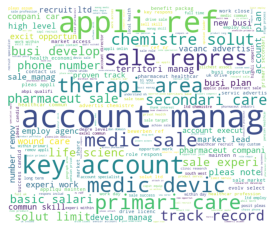

Clinical Research


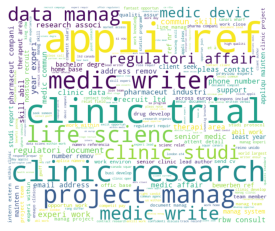

Pharmaceutical Marketing


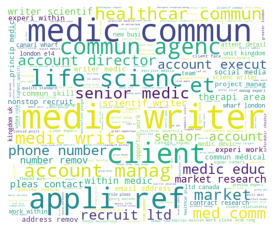

Manufacturing & Operations


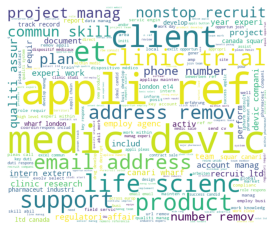

Science


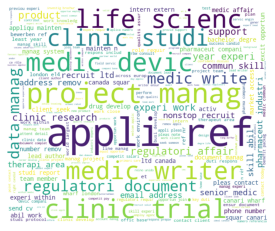

Medical Affairs / Pharmaceutical Physician


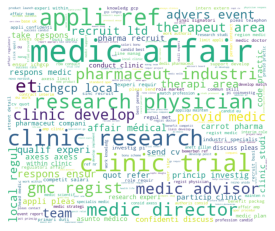

Regulatory Affairs


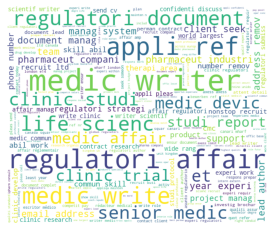

Medical Information and Pharmacovigilance


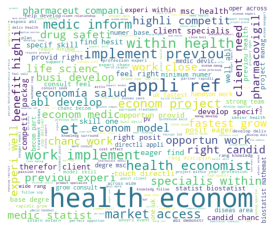

Data Management and Statistics


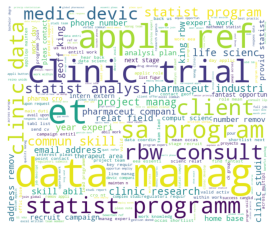

Quality-assurance


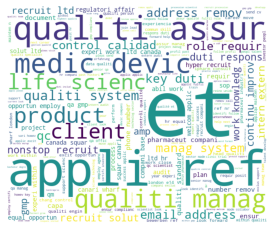

Pharmacy


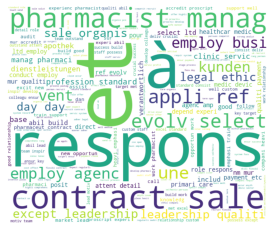

In [11]:
def visualize(label):
    text = ''
    for msg in df[df['category'] == label]['job_description']:
        text += " ".join(msg)
    wordcloud = WordCloud(width=600, height=500, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


for category in df['category'].unique():
    print(category)
    visualize(category)